# **Vehicle and Pedestrian Detection**

download dataset from given links below and upload it on colab

https://drive.google.com/file/d/1m7Q9no6lyooVtX8usysCJvwsOt8jQE-8/view?usp=sharing

https://drive.google.com/file/d/1i-9EOSCFcGX5DyXj26s_F90m7O8zcWvo/view?usp=sharing

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our videos and Haarcascade Classifiers

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

#### **Testing on a Single Frame from our Video**

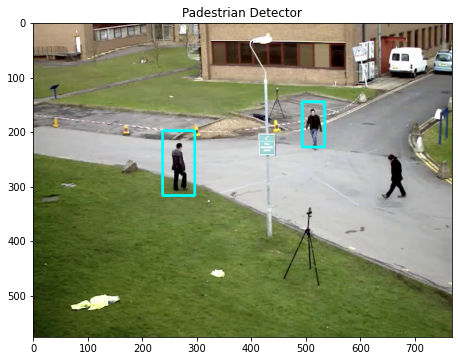

True

In [23]:
# Create our video capturing object
cap = cv2.VideoCapture('/content/walking.mp4')
# Load our body classifier
body_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_fullbody.xml')

# Read first frame
ret,frame =cap.read()

# Ret is True if successfully read
if ret:

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray,1.2,3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
  
# Release our video capture
cap.release()
imshow('Padestrian Detector',frame)
ret

#### **Testing on our 15 second clip**

**NOTE**: Takes around 1 minute to run.

We use cv2.VideoWriter to save the output as an AVI file.

```cv2.VideoWriter(video_output.avi, cv2.VideoWriter_fourcc('M','J','P','G'), FPS, (width, height))```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID



In [26]:
# Create our video capturing object
cap = cv2.VideoCapture('walking.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))
# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
output = cv2.VideoWriter('walking.avi',cv2.VideoWriter_fourcc('M','J','P','G'),30,(w,h))

body_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):
  ret,frame = cap.read()
  if ret:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # Pass frame to our body classifier
    bodies = body_classifier.detectMultiScale(gray,1.2,3)
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
    # Write the frame into the file 'output.avi'
    output.write(frame)
  else:
    break

cap.release()
output.release()

## **Play Video within Colab**
Steps
1. Convert the AVI file to MP4 using FFMPEG
2. Load the HTML plugins in IPython
3. Display our HTML video player

In [29]:
!ffmpeg -i /content/walking.avi walking_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [30]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [31]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)